In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numba import jit
%matplotlib inline

In [2]:
def DrawALine(point_1 = np.array((50,50)), point_2 = np.array((10,10))):
    if point_1[0] > point_2[0]:
        point_1, point_2 = point_2, point_1
    if abs(point_1[0] - point_2[0]) > abs(point_1[1] - point_2[1]):
        x = np.arange(point_1[0], point_2[0]+1)
        y = ((point_2[1] - point_1[1]) / (point_2[0] - point_1[0])) * (x - point_1[0]) + point_1[1]
        return np.array(x).astype(np.uint32), np.array(y).astype(np.uint32)
    else:
        x = np.arange(point_1[1], point_2[1]+1)
        y = ((point_2[0] - point_1[0]) / (point_2[1] - point_1[1])) * (x - point_1[1]) + point_1[0]
        return np.array(y).astype(np.uint32), np.array(x).astype(np.uint32)

In [3]:
@jit
def DrawALine_jit(point_1 = np.array((50,50)), point_2 = np.array((10,10))):
    if point_1[0] > point_2[0]:
        point_1, point_2 = point_2, point_1
    if abs(point_1[0] - point_2[0]) > abs(point_1[1] - point_2[1]):
        x = np.arange(point_1[0], point_2[0]+1)
        y = ((point_2[1] - point_1[1]) / (point_2[0] - point_1[0])) * (x - point_1[0]) + point_1[1]
        return np.array(x).astype(np.uint32), np.array(y).astype(np.uint32)
    else:
        x = np.arange(point_1[1], point_2[1]+1)
        y = ((point_2[0] - point_1[0]) / (point_2[1] - point_1[1])) * (x - point_1[1]) + point_1[0]
        return np.array(y).astype(np.uint32), np.array(x).astype(np.uint32)

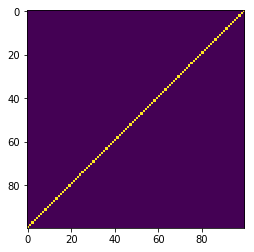

In [4]:
x,y = DrawALine(np.array((0,0)), np.array((99,99)))
img = np.zeros((100,100))
img[x, y] = 1
plt.imshow(np.rot90(img))

In [5]:
DrawALine(np.array((0,0)), np.array((10**8,10**8)))

(array([        0,         1,         2, ...,  99999998,  99999999,
        100000000], dtype=uint32),
 array([        0,         1,         2, ...,  99999998,  99999999,
        100000000], dtype=uint32))

In [11]:
%timeit DrawALine(np.array((0,0)), np.array((10**8,10**8)))

1.67 s ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit DrawALine_jit(np.array((0,0)), np.array((10**8,10**8)))

1.64 s ± 30.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
